## Decision Tree And Knn Implementation from Scratch

by Rina Buoy, PhD

### Import Required Libraries 

In [1]:
import numpy as np


### Define Helper Functions

In [2]:
def gini_impurity(y):
    """Calculate Gini Impurity for a set of labels."""
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def entropy(y):
    """Calculate entropy for a set of labels."""
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add 1e-9 to avoid log(0)


def mse(y):
    """Calculate Mean Squared Error for a set of values."""
    mean = np.mean(y)
    return np.mean((y - mean) ** 2)

def split_data(X, y, feature_idx, threshold):
    """Split dataset based on a feature and a threshold."""
    left_idx = X[:, feature_idx] <= threshold
    right_idx = ~left_idx
    return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

def best_split(X, y, is_classification=True):
    """Find the best feature and threshold to split data."""
    best_feature, best_threshold = None, None
    best_score = float("inf")
    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            _, _, y_left, y_right = split_data(X, y, feature_idx, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            
            if is_classification:
                score = (
                    len(y_left) / len(y) * entropy(y_left)
                    + len(y_right) / len(y) * entropy(y_right)
                )
            else:
                score = (
                    len(y_left) / len(y) * mse(y_left)
                    + len(y_right) / len(y) * mse(y_right)
                )
            
            if score < best_score:
                best_score = score
                best_feature = feature_idx
                best_threshold = threshold
    return best_feature, best_threshold


### Build the Tree Recursively

In [3]:
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(X, y, is_classification=True, depth=0, max_depth=5):
    """Build a Decision Tree recursively."""
    if len(np.unique(y)) == 1 or depth == max_depth:
        value = np.bincount(y).argmax() if is_classification else np.mean(y)
        return DecisionTreeNode(value=value)
    
    feature, threshold = best_split(X, y, is_classification)
    if feature is None:
        value = np.bincount(y).argmax() if is_classification else np.mean(y)
        return DecisionTreeNode(value=value)
    
    X_left, X_right, y_left, y_right = split_data(X, y, feature, threshold)
    left_node = build_tree(X_left, y_left, is_classification, depth + 1, max_depth)
    right_node = build_tree(X_right, y_right, is_classification, depth + 1, max_depth)
    return DecisionTreeNode(feature=feature, threshold=threshold, left=left_node, right=right_node)


### Make Predictions

In [4]:
def predict(tree, X):
    """Predict the target value for each sample."""
    predictions = []
    for sample in X:
        node = tree
        while node.value is None:
            if sample[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        predictions.append(node.value)
    return np.array(predictions)


### Test the Implementation

#### Classification 

In [5]:
# Sample Dataset (Classification)
X = np.array([[2.771244718, 1.784783929],
              [1.728571309, 1.169761413],
              [3.678319846, 2.81281357],
              [3.961043357, 2.61995032],
              [2.999208922, 2.209014212]])
y = np.array([0, 0, 1, 1, 1])

tree = build_tree(X, y, is_classification=True, max_depth=3)
predictions = predict(tree, X)
print("Predictions (Classification):", predictions)


Predictions (Classification): [0 0 1 1 1]


#### Regression 

In [6]:
# Sample Dataset (Regression)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.1, 1.9, 3.0, 3.9, 5.1])

tree = build_tree(X, y, is_classification=False, max_depth=3)
predictions = predict(tree, X)
print("Predictions (Regression):", predictions)


Predictions (Regression): [1.1 1.9 3.  3.9 5.1]


### ScikitLearn

#### Classification 

Accuracy (Classification with Entropy): 1.0


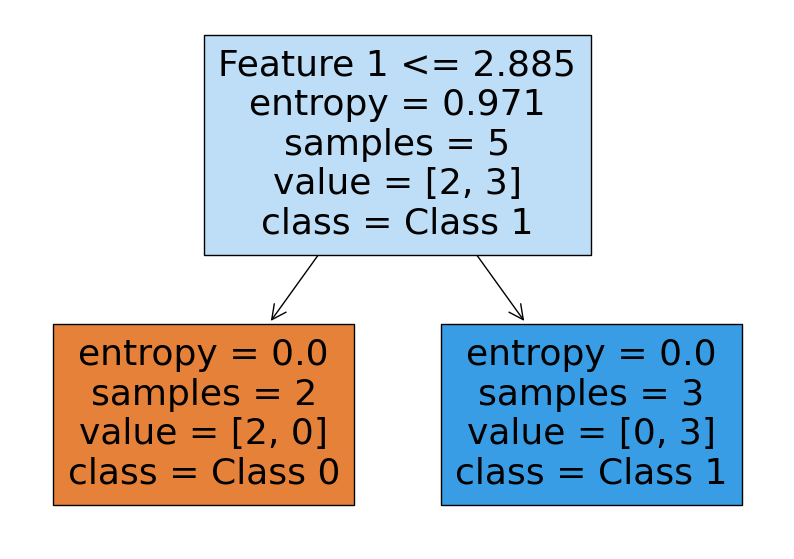

In [7]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# Create Decision Tree Classifier with Entropy
# Sample Dataset (Classification)
X = np.array([[2.771244718, 1.784783929],
              [1.728571309, 1.169761413],
              [3.678319846, 2.81281357],
              [3.961043357, 2.61995032],
              [2.999208922, 2.209014212]])
y = np.array([0, 0, 1, 1, 1])

# Create Decision Tree Classifier with Entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
# Train the classifier
clf.fit(X, y)

# Predict on the training data
y_pred_class = clf.predict(X)

# Evaluate and visualize
print("Accuracy (Classification with Entropy):", accuracy_score(y, y_pred_class))

# Visualize the tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.show()


#### Regression

Mean Squared Error (Regression): 0.0


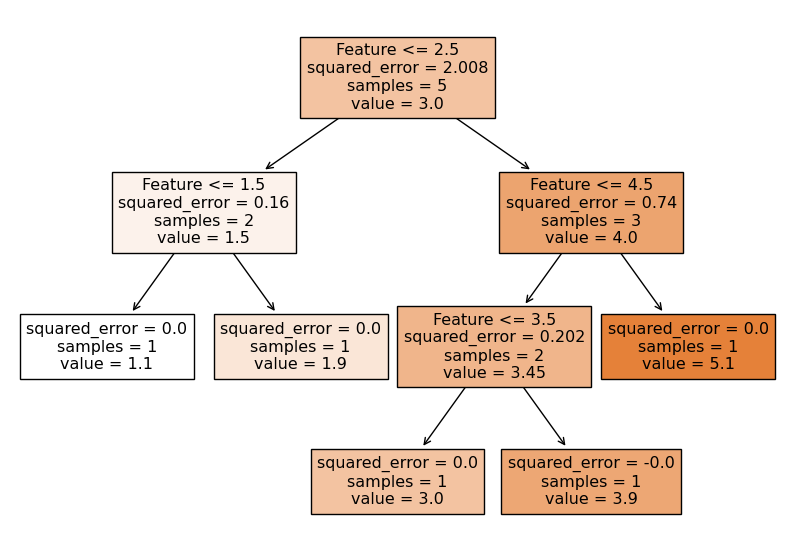

In [8]:
# Sample Dataset (Regression)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.1, 1.9, 3.0, 3.9, 5.1])
# Create Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the regressor
reg.fit(X, y)

# Predict on the training data
y_pred_reg = reg.predict(X)

# Evaluate and visualize
print("Mean Squared Error (Regression):", mean_squared_error(y, y_pred_reg))

# Visualize the tree
plt.figure(figsize=(10, 7))
plot_tree(reg, filled=True, feature_names=["Feature"], impurity=True)
plt.show()
